# gs-quant Free Access Tutorial

Welcome to your interactive tutorial for learning **gs-quant** with free access!

This notebook covers the main functionalities you can use locally, without connecting to Goldman Sachs APIs.
You'll find explanations, examples, and exercises to complete.

## 1️⃣ Core Concepts & Setup

In [53]:

# Install gs-quant if needed
# !pip install gs-quant

from gs_quant.timeseries import *
from gs_quant.data import Dataset
from gs_quant.risk import *
from gs_quant.markets import *

print("✅ gs-quant is ready to use!")


✅ gs-quant is ready to use!


## 2️⃣ Time Series Analysis

In [54]:

from gs_quant.timeseries import generate_series, moving_average, volatility, returns

prices = generate_series(100)
print("📈 Sample data:\n", prices.head())

log_ret = returns(prices)
ma_10 = moving_average(prices, 10)
vol_10 = volatility(prices, 10)

print("\n📉 10-day moving average:\n", ma_10.tail())
print("\n⚡ 10-day volatility:\n", vol_10.tail())


📈 Sample data:
 2025-10-07    100.000000
2025-10-08    100.752963
2025-10-09    102.517765
2025-10-10    103.384684
2025-10-11    102.978155
dtype: float64

📉 10-day moving average:
 2026-01-10    113.766189
2026-01-11    113.798923
2026-01-12    113.725742
2026-01-13    113.671073
2026-01-14    113.616875
dtype: float64

⚡ 10-day volatility:
 2026-01-10     9.759460
2026-01-11    10.857032
2026-01-12    12.031208
2026-01-13    12.239993
2026-01-14    12.238737
dtype: float64


### ✍️ Exercise 1
Fill in the blanks to compute 20-day returns, moving average, and volatility.

## 3️⃣ Data Manipulation & Plotting

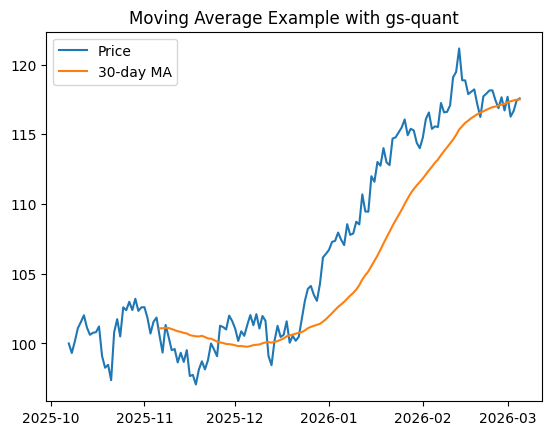

In [55]:

import matplotlib.pyplot as plt
from gs_quant.timeseries import generate_series, moving_average

data = generate_series(150)
ma_30 = moving_average(data, 30)

plt.plot(data, label="Price")
plt.plot(ma_30, label="30-day MA")
plt.legend()
plt.title("Moving Average Example with gs-quant")
plt.show()


### ✍️ Exercise 2
Plot a 15-day moving average and the original prices.

## 4️⃣ Local Pricing & Risk Models

In [56]:
from gs_quant.instrument import EqStock
from gs_quant.markets.portfolio import Portfolio
import pandas as pd

# 1️⃣ Define portfolio positions
positions = [
    EqStock(name="AAPL", quantity=100),
    EqStock(name="GOOG", quantity=50),
    EqStock(name="TSLA", quantity=20)
]

portfolio = Portfolio(positions)
print("💼 Portfolio created:\n", portfolio)

# 2️⃣ Mock market prices (as if they came from live data)
market_prices = {
    "AAPL": 180.0,
    "GOOG": 2700.0,
    "TSLA": 900.0
}

# 3️⃣ Calculate DollarPrice and weights
data = []
total_value = 0
for position in positions:
    price = market_prices.get(position.name, 0)
    dollar_price = price * position.quantity
    total_value += dollar_price
    data.append({
        "Instrument": position.name,
        "Quantity": position.quantity,
        "Price": price,
        "DollarPrice": dollar_price
    })

# Calculate portfolio weights
for row in data:
    row["Weight"] = row["DollarPrice"] / total_value

# 4️⃣ Convert to DataFrame for easy display
df = pd.DataFrame(data)
print("\n🧮 Portfolio risk analysis (mock):\n", df)
print("\n💰 Total portfolio value: $", total_value)



💼 Portfolio created:
 Portfolio(3 instrument(s))

🧮 Portfolio risk analysis (mock):
   Instrument  Quantity   Price  DollarPrice    Weight
0       AAPL       100   180.0      18000.0  0.105263
1       GOOG        50  2700.0     135000.0  0.789474
2       TSLA        20   900.0      18000.0  0.105263

💰 Total portfolio value: $ 171000.0


### ✍️ Exercise 3
Create your own portfolio and a mock dictionary of risk measures.

## 5️⃣ Portfolio Analytics (Offline)

In [57]:

from gs_quant.instrument import EqStock
from gs_quant.markets.portfolio import Portfolio

# Define positions as EqStock instruments (each representing a stock holding)
positions = [
    EqStock(name="AAPL", quantity=100),
    EqStock(name="GOOG", quantity=50),
    EqStock(name="TSLA", quantity=20)
]

# Create a portfolio
portfolio = Portfolio(positions)
print("💼 Portfolio:\n", portfolio)



💼 Portfolio:
 Portfolio(3 instrument(s))


### ✍️ Exercise 4
Create a crypto portfolio with 3 assets and display it.

## 6️⃣ Utility Functions

📊 Returns of series a:
 2026-04-20   -0.003044
2026-04-21   -0.006220
2026-04-22   -0.011077
2026-04-23    0.002927
2026-04-24   -0.012908
dtype: float64
📉 10-day Moving Average of series a:
 2026-04-20    99.187162
2026-04-21    99.282990
2026-04-22    99.174789
2026-04-23    99.056391
2026-04-24    98.785744
dtype: float64
⚡ 10-day Volatility of series a:
 2026-04-20    18.659519
2026-04-21    17.603515
2026-04-22    17.834497
2026-04-23    17.763429
2026-04-24    18.538404
dtype: float64
📈 Correlation (a vs b):
 2026-04-20    0.004625
2026-04-21    0.003542
2026-04-22    0.006162
2026-04-23    0.007861
2026-04-24   -0.002081
dtype: float64
⚖️ Beta (a vs b):
 2026-04-20    0.004267
2026-04-21    0.003271
2026-04-22    0.005708
2026-04-23    0.007262
2026-04-24   -0.001921
dtype: float64


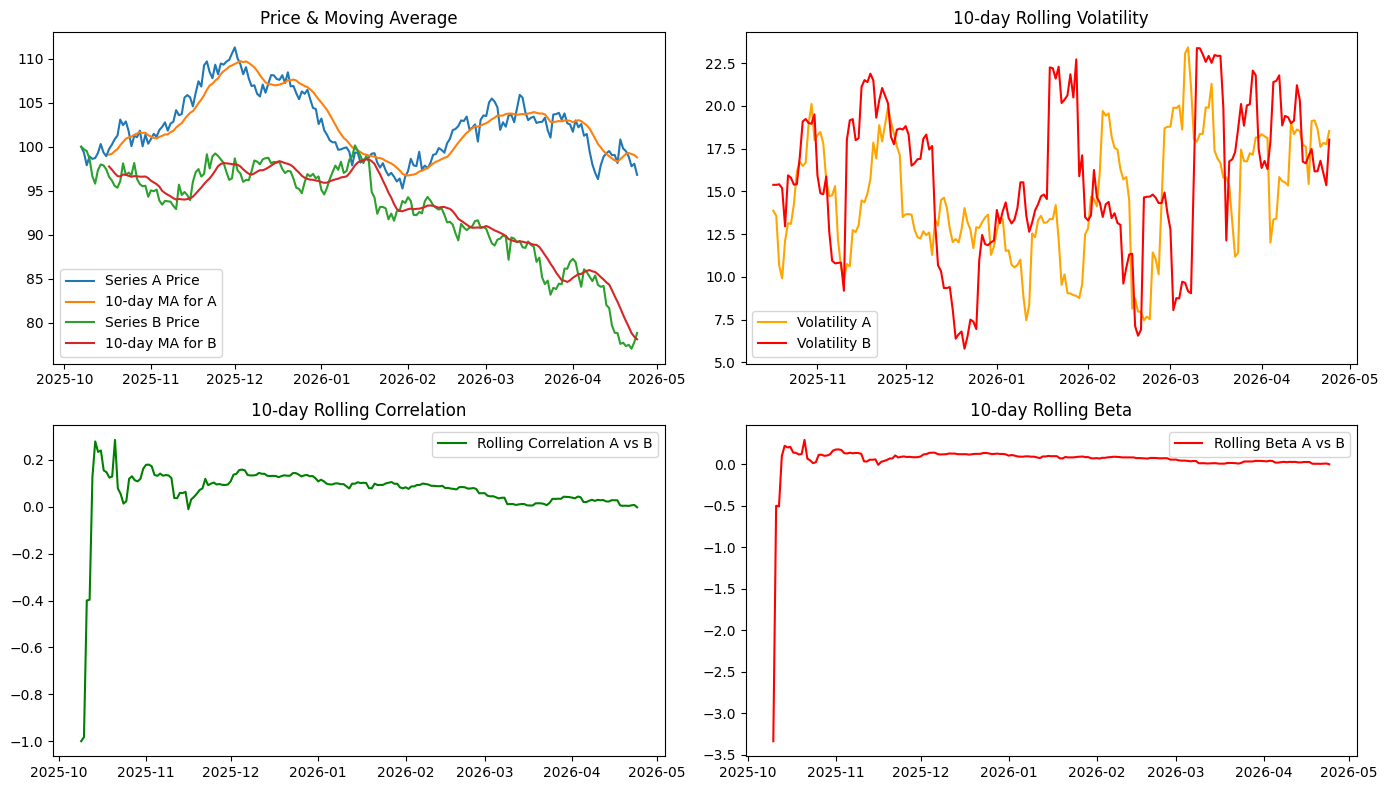

In [58]:

# Import libraries
import matplotlib.pyplot as plt
#from gs_quant.timeseries import generate_series, correlation, beta, returns, moving_average, volatility, z_score

# -----------------------------------------------------------------------------
# 1️⃣ Generate fake time series data
# Input: number of points (integer)
# Output: pandas Series with random price-like values
a = generate_series(200)
b = generate_series(200)

# -----------------------------------------------------------------------------
# 2️⃣ Returns
# Input: pandas Series of prices
# Output: pandas Series of daily returns (log returns by default)
ret_a = returns(a)
ret_b = returns(b)

# -----------------------------------------------------------------------------
# 3️⃣ Moving Average
# Input: pandas Series, window size
# Output: rolling average
ma_a = moving_average(a, 10)
ma_b = moving_average(b, 10)

# -----------------------------------------------------------------------------
# 4️⃣ Volatility
# Input: pandas Series, window size
# Output: rolling volatility
vol_a = volatility(a, 10)
vol_b = volatility(b, 10)

# -----------------------------------------------------------------------------
# 5️⃣ Correlation
# Input: two Series
# Output: rolling correlation
corr = correlation(a, b)

# -----------------------------------------------------------------------------
# 6️⃣ Beta
# Input: two Series
# Output: rolling beta (sensitivity of a vs b)
bta = beta(a, b)

# -----------------------------------------------------------------------------
# Print example outputs
print("📊 Returns of series a:\n", ret_a.tail())
print("📉 10-day Moving Average of series a:\n", ma_a.tail())
print("⚡ 10-day Volatility of series a:\n", vol_a.tail())
print("📈 Correlation (a vs b):\n", corr.tail())
print("⚖️ Beta (a vs b):\n", bta.tail())

# -----------------------------------------------------------------------------
# PLOTS
plt.figure(figsize=(14, 8))

# Price & Moving Average
plt.subplot(2,2,1)
plt.plot(a, label="Series A Price")
plt.plot(ma_a, label="10-day MA for A")
plt.plot(b, label="Series B Price")
plt.plot(ma_b, label="10-day MA for B")
plt.title("Price & Moving Average")
plt.legend()

# Volatility
plt.subplot(2,2,2)
plt.plot(vol_a, color="orange", label="Volatility A")
plt.plot(vol_b, color="red", label="Volatility B")
plt.title("10-day Rolling Volatility")
plt.legend()

# Correlation
plt.subplot(2,2,3)
plt.plot(corr, color="green", label="Rolling Correlation A vs B")
plt.title("10-day Rolling Correlation")
plt.legend()

# Beta
plt.subplot(2,2,4)
plt.plot(bta, color="red", label="Rolling Beta A vs B")
plt.title("10-day Rolling Beta")
plt.legend()

plt.tight_layout()
plt.show()



### ✍️ Exercise 5
Compute correlation and beta for two random series.

In [60]:

import gs_quant.timeseries as ts
print(dir(ts))


['ASSET_SPEC', 'AbstractHolidayCalendar', 'AggregateFunction', 'AggregatePeriod', 'AnnualizationFactor', 'Any', 'Asset', 'AssetClass', 'AssetIdentifier', 'AssetType', 'BASIC_MEASURES', 'BASIS_TO_DATASET', 'BASIS_TO_FIELD', 'BDay', 'BENCHMARK_TO_DEFAULT_FLOATING_RATE_TENORS', 'Basket', 'BenchmarkType', 'BenchmarkTypeCB', 'Bond', 'CCY_TO_CB', 'CENTRAL_BANK_WATCH_START_DATE', 'CROSSCURRENCY_RATES_DEFAULTS', 'CROSS_BBID_TO_DUMMY_OISXCCY_ASSET', 'CROSS_TO_CROSS_CURRENCY_BASIS', 'CURRENCY_TO_CSA_DEFAULT_MAP', 'CURRENCY_TO_DEFAULT_RATE_BENCHMARK', 'CURRENCY_TO_DUMMY_CROSSCURRENCY_SWAP_BBID', 'CURRENCY_TO_DUMMY_FFO_BBID', 'CURRENCY_TO_DUMMY_FFO_BBID_VOL_SWAPS', 'CURRENCY_TO_DUMMY_INFLATION_SWAP_BBID', 'CURRENCY_TO_DUMMY_SWAP_BBID', 'CURRENCY_TO_INDEX_BENCHMARK', 'CURRENCY_TO_INFLATION_RATE_BENCHMARK', 'CURRENCY_TO_OIS_RATE_BENCHMARK', 'CURRENCY_TO_PRICING_LOCATION', 'CURRENCY_TO_SWAP_RATE_BENCHMARK', 'CURRENCY_TO_XCCY_SWAP_RATE_BENCHMARK', 'Callable', 'CdsVolReference', 'CrossCurrencyRateOptio

Signal Identification

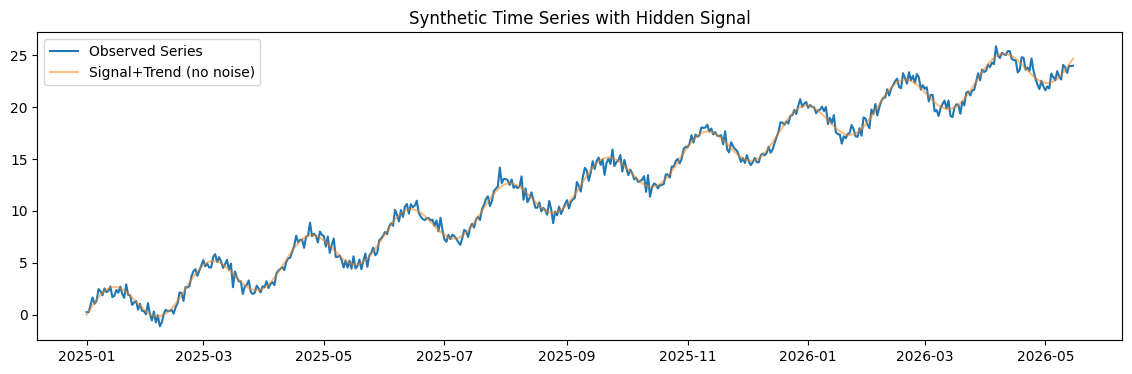

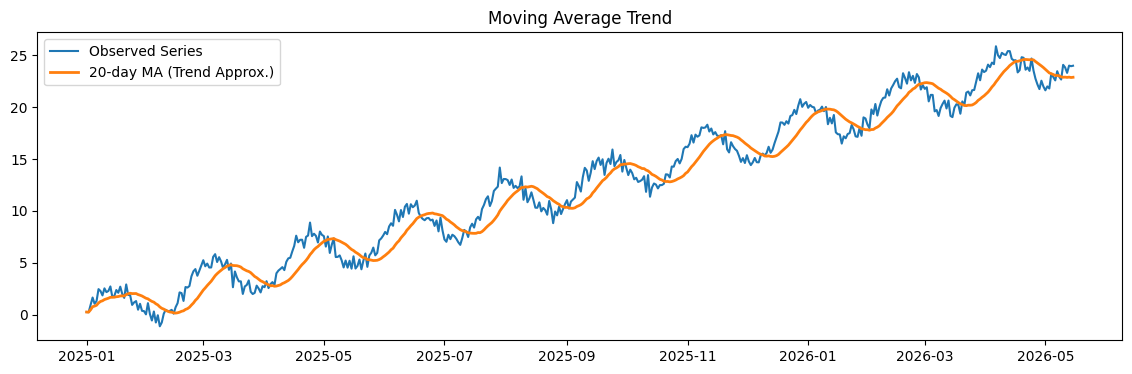

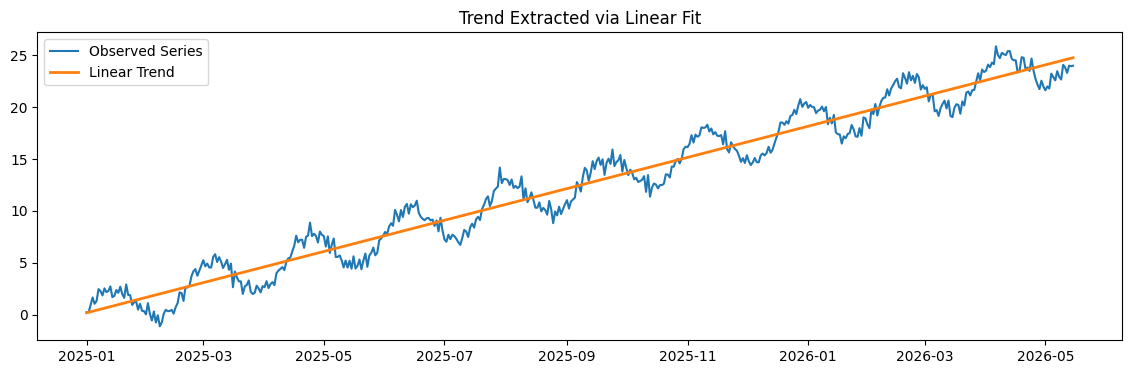

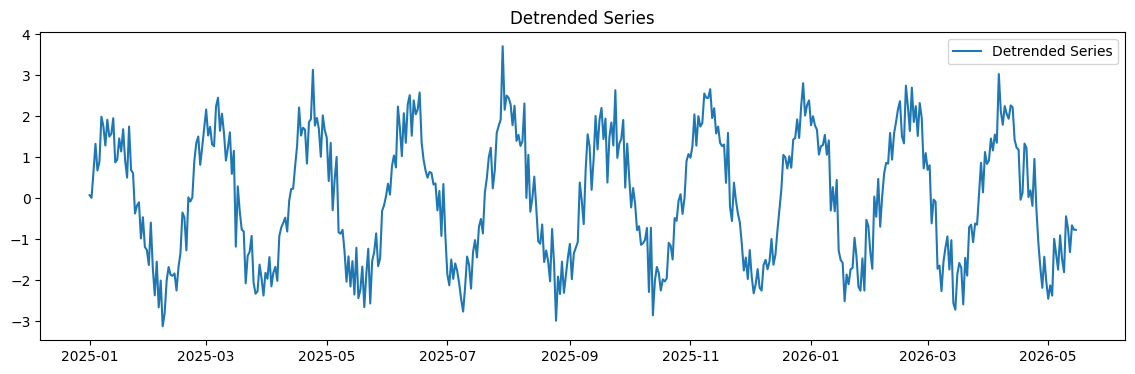

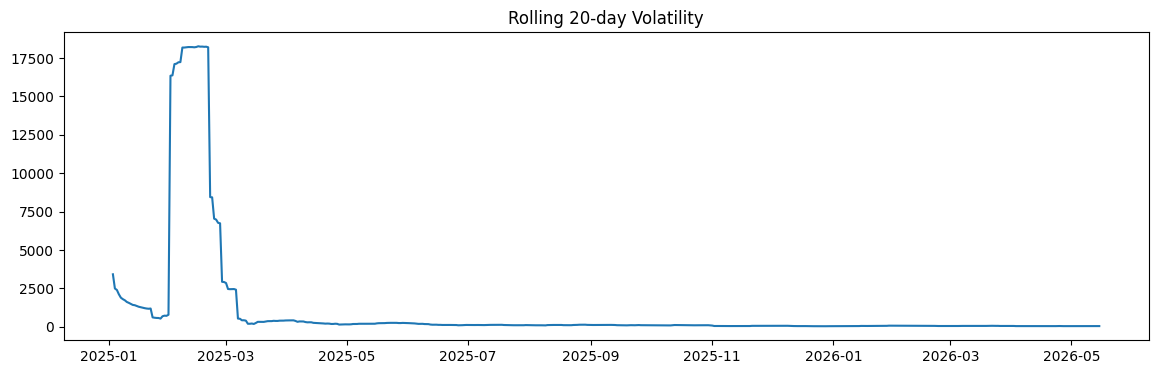

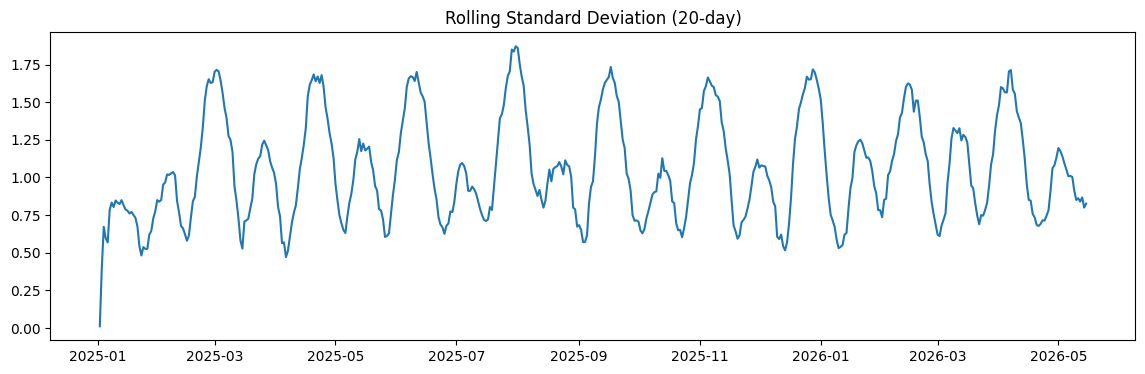

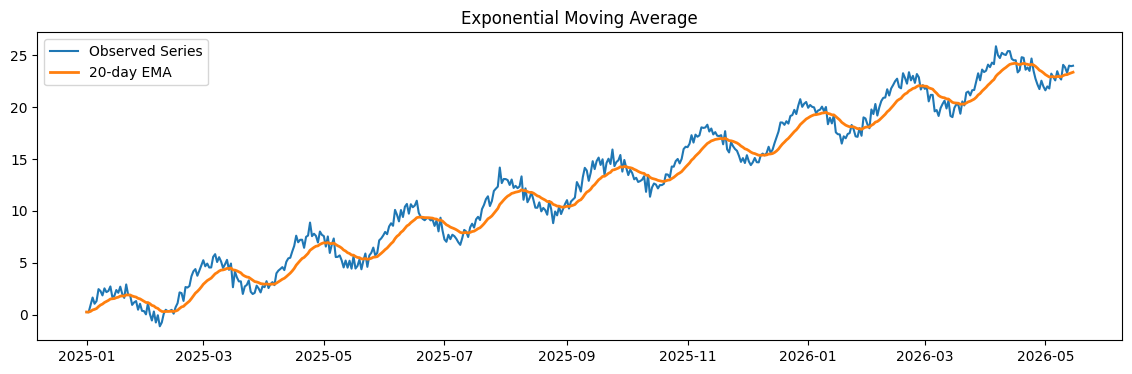

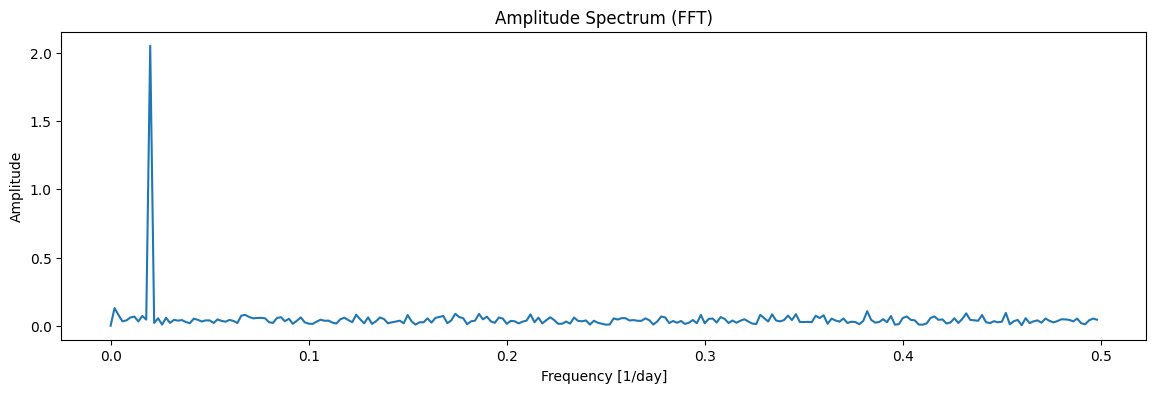

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from gs_quant.timeseries import moving_average, trend, volatility, rolling_std, exponential_moving_average

# ----------------------------
# 1️⃣ Create synthetic time series with hidden signal
# ----------------------------
np.random.seed(42)
n = 500

time = np.arange(n)
signal = 2 * np.sin(2 * np.pi * time / 50)
trend_component = 0.05 * time
noise = np.random.normal(0, 0.5, n)

ts_data = trend_component + signal + noise
ts_series = pd.Series(ts_data, index=pd.date_range("2025-01-01", periods=n))
win = Window(20, 0)  # 20-day window, 0-day offset
# Use 20-day offset as pandas DateOffset
offset = pd.DateOffset(days=20)

plt.figure(figsize=(14,4))
plt.plot(ts_series, label="Observed Series")
plt.plot(ts_series - noise, label="Signal+Trend (no noise)", alpha=0.5)
plt.legend()
plt.title("Synthetic Time Series with Hidden Signal")
plt.show()

# ----------------------------
# Extract trend using moving average
# ----------------------------
ma = moving_average(ts_series, win)
plt.figure(figsize=(14,4))
plt.plot(ts_series, label="Observed Series")
plt.plot(ma, label="20-day MA (Trend Approx.)", linewidth=2)
plt.legend()
plt.title("Moving Average Trend")
plt.show()

# Linear trend using numpy polyfit
x = np.arange(len(ts_series))
coeff = np.polyfit(x, ts_series.values, 1)  # linear trend
trend_ts = pd.Series(np.polyval(coeff, x), index=ts_series.index)

plt.figure(figsize=(14,4))
plt.plot(ts_series, label="Observed Series")
plt.plot(trend_ts, label="Linear Trend", linewidth=2)
plt.legend()
plt.title("Trend Extracted via Linear Fit")
plt.show()

# Detrended series
detrended = ts_series - trend_ts
plt.figure(figsize=(14,4))
plt.plot(detrended, label="Detrended Series")
plt.legend()
plt.title("Detrended Series")
plt.show()


# ----------------------------
# 5️⃣ Rolling volatility
# ----------------------------
vol = volatility(ts_series, win)
plt.figure(figsize=(14,4))
plt.plot(vol)
plt.title("Rolling 20-day Volatility")
plt.show()

# ----------------------------
# 6️⃣ Rolling standard deviation (alternative)
# ----------------------------
roll_std = rolling_std(ts_series, offset)
plt.figure(figsize=(14,4))
plt.plot(roll_std)
plt.title("Rolling Standard Deviation (20-day)")
plt.show()

# ----------------------------
# 7️⃣ Exponential moving average
# ----------------------------
ema = exponential_moving_average(ts_series, beta=0.9)  # beta is the smoothing factor
plt.figure(figsize=(14,4))
plt.plot(ts_series, label="Observed Series")
plt.plot(ema, label="20-day EMA", linewidth=2)
plt.legend()
plt.title("Exponential Moving Average")
plt.show()

# ----------------------------
# 3️⃣ Spectral analysis using FFT
# ----------------------------
from numpy.fft import fft, fftfreq

y = detrended.values
N = len(y)
T = 1.0  # 1 day sampling interval

yf = fft(y)
xf = fftfreq(N, T)[:N//2]  # positive frequencies only

plt.figure(figsize=(14,4))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Amplitude Spectrum (FFT)")
plt.xlabel("Frequency [1/day]")
plt.ylabel("Amplitude")
plt.show()


## 🧩 Final Challenge: Build Your Own Analysis
**Problem:**

You have to simulate and analyze a fake stock price time series using `gs-quant`.

### Requirements:
1. Generate a fake price time series of 250 days.
2. Compute:
   - Daily returns
   - 30-day moving average
   - 30-day volatility
3. Plot all three on the same graph.
4. Print a short summary:
   - Mean return
   - Max drawdown (hint: use pandas operations)

### 🎯 Goal:
Display insights about your fake stock, just like a real analyst would.

➡️ Write your full code below: